In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from scipy.stats import norm
import math
%matplotlib inline
pd.options.display.max_rows = 100
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import statistics as st
import random

# Day 1
## 1.1 aggregating data & 1.2 Standardizing header names

In [2]:
# read files from .csv files
file1 = pd.read_csv("Data/file1.csv")
file2 = pd.read_csv("Data/file2.csv")
file3 = pd.read_csv("Data/file3.csv")

# sort indices in alphabetical order
file1 = file1.reindex(sorted(file1.columns), axis=1)
file2 = file2.reindex(sorted(file2.columns), axis=1)
file3 = file3.reindex(sorted(file3.columns), axis=1)

In [3]:
# create standardised lower case form of column headers
cols = sorted(file3.columns.str.replace(" ", "_").str.lower())

In [4]:
# assign new column headers to all files
file1.columns = cols
file2.columns = cols
file3.columns = cols

In [5]:
# concatenate all files into one dataframe
df = pd.concat([file1, file2, file3], axis=0).reset_index(drop=True)

## 1.3 Removing duplicates

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9135 entries, 0 to 12073
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer                   9134 non-null   object 
 1   customer_lifetime_value    9127 non-null   object 
 2   education                  9134 non-null   object 
 3   gender                     9012 non-null   object 
 4   income                     9134 non-null   float64
 5   monthly_premium_auto       9134 non-null   float64
 6   number_of_open_complaints  9134 non-null   object 
 7   policy_type                9134 non-null   object 
 8   state                      9134 non-null   object 
 9   total_claim_amount         9134 non-null   float64
 10  vehicle_class              9134 non-null   object 
dtypes: float64(3), object(8)
memory usage: 856.4+ KB


## 1.4 Deleting and rearranging columns

In [8]:
df = df.drop("customer", axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9135 entries, 0 to 12073
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_lifetime_value    9127 non-null   object 
 1   education                  9134 non-null   object 
 2   gender                     9012 non-null   object 
 3   income                     9134 non-null   float64
 4   monthly_premium_auto       9134 non-null   float64
 5   number_of_open_complaints  9134 non-null   object 
 6   policy_type                9134 non-null   object 
 7   state                      9134 non-null   object 
 8   total_claim_amount         9134 non-null   float64
 9   vehicle_class              9134 non-null   object 
dtypes: float64(3), object(7)
memory usage: 785.0+ KB


## 1.5 Working with data types

In [10]:
# convert customer_lifetime_value to integers
# drop all rows with np.nan in customer lifetime value column
# drop all rows with np.nan in all columns

df["customer_lifetime_value"] = df["customer_lifetime_value"].apply(lambda x: float(x.strip("%"))/100 if type(x) == str else x)
df.dropna(subset=["customer_lifetime_value"], inplace=True)
df.dropna(how="all", inplace=True)

# truncate clv column to int
#df["customer_lifetime_value"] = df["customer_lifetime_value"].astype(int)

## 1.6 no. of open complaints

In [11]:
# extract number of open complaints from in between "/"
df.number_of_open_complaints = df.number_of_open_complaints.apply(lambda x: int(x.split("/")[1]) if type(x) == str else x)

In [12]:
df.number_of_open_complaints.apply(type).value_counts()

<class 'int'>    9127
Name: number_of_open_complaints, dtype: int64

## 1.7 Filtering data and Correcting typos

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9127 entries, 1 to 12073
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_lifetime_value    9127 non-null   float64
 1   education                  9127 non-null   object 
 2   gender                     9007 non-null   object 
 3   income                     9127 non-null   float64
 4   monthly_premium_auto       9127 non-null   float64
 5   number_of_open_complaints  9127 non-null   int64  
 6   policy_type                9127 non-null   object 
 7   state                      9127 non-null   object 
 8   total_claim_amount         9127 non-null   float64
 9   vehicle_class              9127 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 784.4+ KB


In [14]:
df["gender"].unique()

array(['F', 'M', nan, 'Femal', 'Male', 'female'], dtype=object)

In [15]:
# standardise gender column
genders_dct = { "male" : ["M", "Male"], "female" : ["F", "Femal", "female"]}

df["gender"] = df["gender"].apply(lambda x: "m" if x in genders_dct["male"] else x)
df["gender"] = df["gender"].apply(lambda x: "f" if x in genders_dct["female"] else x)

In [16]:
# drop all rows with np.nans in the column "gender"
df["gender"] = df["gender"].dropna()

In [17]:
df["state"].unique()

array(['Arizona', 'Nevada', 'California', 'Washington', 'Oregon', 'Cali',
       'AZ', 'WA'], dtype=object)

In [18]:
# standardise state column
df["state"] = df["state"].apply(lambda x: "Arizona" if x == "AZ" else x)
df["state"] = df["state"].apply(lambda x: "California" if x == "Cali" else x)
df["state"] = df["state"].apply(lambda x: "Washington" if x == "WA" else x)

# Day 2

## 2.1 Replacing null values

In [19]:
df.head()

,customer_lifetime_value,education,gender,income,monthly_premium_auto,number_of_open_complaints,policy_type,state,total_claim_amount,vehicle_class
1,6979.5359,Bachelor,f,0.0,94.0,0,Personal Auto,Arizona,1131.464935,Four-Door Car
2,12887.4317,Bachelor,f,48767.0,108.0,0,Personal Auto,Nevada,566.472247,Two-Door Car
3,7645.8618,Bachelor,m,0.0,106.0,0,Corporate Auto,California,529.881344,SUV
4,5363.0765,High School or Below,m,36357.0,68.0,0,Personal Auto,Washington,17.269323,Four-Door Car
5,8256.2978,Bachelor,f,62902.0,69.0,0,Personal Auto,Oregon,159.383042,Two-Door Car


In [20]:
# replace null values in df.income with the mean of the column
df.income.replace(0,df.income.mean(axis=0),inplace=True)

## 2.2 Bucketing the data

In [21]:
# function to create buckets for the states
def region_buckets(df):
    region_dct = { "California" : "West Region", "Oregon" : "North West", "Washington" : "East", "Arizona" : "Central", "Nevada" : "Central"}
    df.replace(region_dct, inplace=True)
    return df

In [22]:
region_buckets(df)

,customer_lifetime_value,education,gender,income,monthly_premium_auto,number_of_open_complaints,policy_type,state,total_claim_amount,vehicle_class
1,6979.535900,Bachelor,f,37830.701764,94.0,0,Personal Auto,Central,1131.464935,Four-Door Car
2,12887.431700,Bachelor,f,48767.000000,108.0,0,Personal Auto,Central,566.472247,Two-Door Car
3,7645.861800,Bachelor,m,37830.701764,106.0,0,Corporate Auto,West Region,529.881344,SUV
4,5363.076500,High School or Below,m,36357.000000,68.0,0,Personal Auto,East,17.269323,Four-Door Car
5,8256.297800,Bachelor,f,62902.000000,69.0,0,Personal Auto,North West,159.383042,Two-Door Car
...,...,...,...,...,...,...,...,...,...,...
12069,23405.987980,Bachelor,m,71941.000000,73.0,0,Personal Auto,West Region,198.234764,Four-Door Car
12070,3096.511217,College,f,21604.000000,79.0,0,Corporate Auto,West Region,379.200000,Four-Door Car
12071,8163.890428,Bachelor,m,37830.701764,85.0,3,Corporate Auto,West Region,790.784983,Four-Door Car
12072,7524.442436,College,m,21941.000000,96.0,0,Personal Auto,West Region,691.200000,Four-Door Car


## 2.3 optional: merge vehicle classes

In [23]:
def merge_vehicle_classes(df):
    v_class_dct = { "Luxury SUV" : "Luxury Vehicle", "Luxury Car" : "Luxury Vehicle"}
    df.replace(v_class_dct, inplace=True)
    return df

In [24]:
merge_vehicle_classes(df)

,customer_lifetime_value,education,gender,income,monthly_premium_auto,number_of_open_complaints,policy_type,state,total_claim_amount,vehicle_class
1,6979.535900,Bachelor,f,37830.701764,94.0,0,Personal Auto,Central,1131.464935,Four-Door Car
2,12887.431700,Bachelor,f,48767.000000,108.0,0,Personal Auto,Central,566.472247,Two-Door Car
3,7645.861800,Bachelor,m,37830.701764,106.0,0,Corporate Auto,West Region,529.881344,SUV
4,5363.076500,High School or Below,m,36357.000000,68.0,0,Personal Auto,East,17.269323,Four-Door Car
5,8256.297800,Bachelor,f,62902.000000,69.0,0,Personal Auto,North West,159.383042,Two-Door Car
...,...,...,...,...,...,...,...,...,...,...
12069,23405.987980,Bachelor,m,71941.000000,73.0,0,Personal Auto,West Region,198.234764,Four-Door Car
12070,3096.511217,College,f,21604.000000,79.0,0,Corporate Auto,West Region,379.200000,Four-Door Car
12071,8163.890428,Bachelor,m,37830.701764,85.0,3,Corporate Auto,West Region,790.784983,Four-Door Car
12072,7524.442436,College,m,21941.000000,96.0,0,Personal Auto,West Region,691.200000,Four-Door Car


In [25]:
df.loc[df.vehicle_class=="Luxury Vehicle"]

,customer_lifetime_value,education,gender,income,monthly_premium_auto,number_of_open_complaints,policy_type,state,total_claim_amount,vehicle_class
31,18975.456100,High School or Below,NaN,65999.000000,237.0,0,Corporate Auto,Central,615.927769,Luxury Vehicle
79,58166.553500,Bachelor,NaN,61321.000000,186.0,1,Personal Auto,West Region,427.631210,Luxury Vehicle
123,15023.598600,High School or Below,NaN,28262.000000,192.0,0,Personal Auto,West Region,921.600000,Luxury Vehicle
181,16936.271500,Bachelor,f,39411.000000,217.0,2,Personal Auto,Central,1122.658899,Luxury Vehicle
196,9951.707700,High School or Below,m,56855.000000,255.0,0,Corporate Auto,North West,1836.000000,Luxury Vehicle
...,...,...,...,...,...,...,...,...,...,...
11863,6674.177684,College,m,37830.701764,189.0,0,Personal Auto,West Region,1737.320276,Luxury Vehicle
11883,19337.901030,College,m,26488.000000,247.0,0,Personal Auto,West Region,1321.584957,Luxury Vehicle
11966,16909.927670,College,m,65620.000000,213.0,0,Corporate Auto,West Region,766.322388,Luxury Vehicle
11989,32104.699570,High School or Below,f,89546.000000,266.0,1,Corporate Auto,West Region,2452.894264,Luxury Vehicle


## 2.4 optional: Removing outliers

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9127 entries, 1 to 12073
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_lifetime_value    9127 non-null   float64
 1   education                  9127 non-null   object 
 2   gender                     9007 non-null   object 
 3   income                     9127 non-null   float64
 4   monthly_premium_auto       9127 non-null   float64
 5   number_of_open_complaints  9127 non-null   int64  
 6   policy_type                9127 non-null   object 
 7   state                      9127 non-null   object 
 8   total_claim_amount         9127 non-null   float64
 9   vehicle_class              9127 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 784.4+ KB


In [27]:
# calculate quartiles
def remove_outliers(df, cols):
    for col in cols:
        q = st.quantiles(df[col], n=4)
        iqr = q[2] - q[0]
        mask = ~(((q[0] - 1.5*iqr) >= df[col]) | (df[col] >= (q[2] + 1.5*iqr)))
        df = df.loc[mask]
    return df

In [28]:
remove_outliers(df, ['customer_lifetime_value', 'income', 'total_claim_amount'])

,customer_lifetime_value,education,gender,income,monthly_premium_auto,number_of_open_complaints,policy_type,state,total_claim_amount,vehicle_class
2,12887.431700,Bachelor,f,48767.000000,108.0,0,Personal Auto,Central,566.472247,Two-Door Car
3,7645.861800,Bachelor,m,37830.701764,106.0,0,Corporate Auto,West Region,529.881344,SUV
4,5363.076500,High School or Below,m,36357.000000,68.0,0,Personal Auto,East,17.269323,Four-Door Car
5,8256.297800,Bachelor,f,62902.000000,69.0,0,Personal Auto,North West,159.383042,Two-Door Car
6,5380.898600,College,f,55350.000000,67.0,0,Corporate Auto,North West,321.600000,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...
12068,4100.398533,College,f,47761.000000,104.0,0,Personal Auto,West Region,541.282007,Four-Door Car
12070,3096.511217,College,f,21604.000000,79.0,0,Corporate Auto,West Region,379.200000,Four-Door Car
12071,8163.890428,Bachelor,m,37830.701764,85.0,3,Corporate Auto,West Region,790.784983,Four-Door Car
12072,7524.442436,College,m,21941.000000,96.0,0,Personal Auto,West Region,691.200000,Four-Door Car


## 2.5 optional: Standardizing the data

In [29]:
df.select_dtypes(object).applymap(lambda x: str(x).lower().replace(" ", "_"))

,education,gender,policy_type,state,vehicle_class
1,bachelor,f,personal_auto,central,four-door_car
2,bachelor,f,personal_auto,central,two-door_car
3,bachelor,m,corporate_auto,west_region,suv
4,high_school_or_below,m,personal_auto,east,four-door_car
5,bachelor,f,personal_auto,north_west,two-door_car
...,...,...,...,...,...
12069,bachelor,m,personal_auto,west_region,four-door_car
12070,college,f,corporate_auto,west_region,four-door_car
12071,bachelor,m,corporate_auto,west_region,four-door_car
12072,college,m,personal_auto,west_region,four-door_car


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9127 entries, 1 to 12073
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_lifetime_value    9127 non-null   float64
 1   education                  9127 non-null   object 
 2   gender                     9007 non-null   object 
 3   income                     9127 non-null   float64
 4   monthly_premium_auto       9127 non-null   float64
 5   number_of_open_complaints  9127 non-null   int64  
 6   policy_type                9127 non-null   object 
 7   state                      9127 non-null   object 
 8   total_claim_amount         9127 non-null   float64
 9   vehicle_class              9127 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 784.4+ KB


# Day 3 and 4
## Data Visualization

In [31]:
c_df = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv').iloc[:,1:] # pre-conditioned data
c_df

,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,4809,no,basic,college,2/18/11,feb,employed,m,48029,suburban,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,suburban,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,suburban,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,22332,yes,extended,college,1/11/11,jan,employed,m,49078,suburban,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,suburban,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,suburban,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,5259,no,basic,college,1/6/11,jan,employed,f,61146,urban,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,rural,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,11971,no,premium,college,2/13/11,feb,employed,f,64195,urban,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [32]:
numericals_df   = c_df.select_dtypes(include=np.number) # get numerical columns using the select_dtypes method
categoricals_df = c_df.select_dtypes(exclude=np.number)    # get cat columns

In [33]:
numericals_df.columns
categoricals_df.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

Index(['response', 'coverage', 'education', 'effective_to_date', 'month',
       'employment_status', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [34]:
c_df = pd.concat([categoricals_df, numericals_df],axis=1)

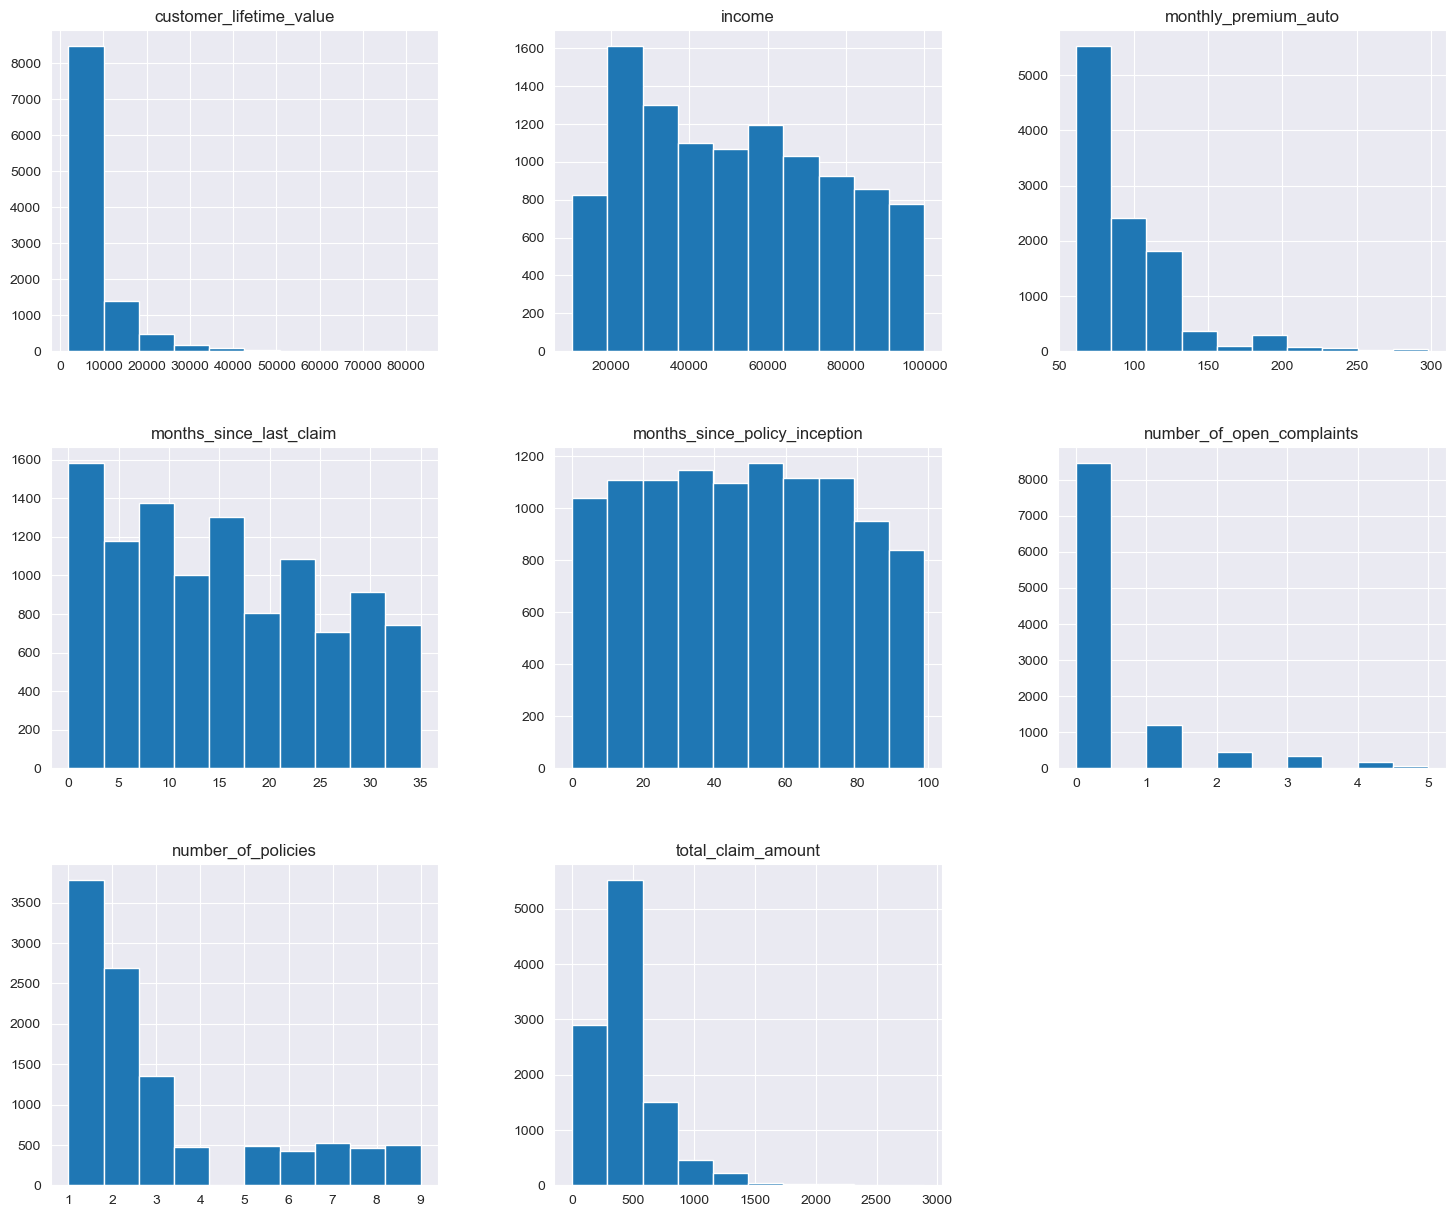

In [35]:
_=numericals_df.hist(figsize=(18,15)) # make histograms

In [36]:
c_df

,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,...,vehicle_class,vehicle_size,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,...,four-door car,medsize,4809,48029,61,7,52,0,9,292
1,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,...,four-door car,medsize,2228,92260,64,3,26,0,1,744
2,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,...,suv,medsize,14947,22139,100,34,31,0,2,480
3,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,...,four-door car,medsize,22332,49078,97,10,3,0,2,484
4,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,...,four-door car,medsize,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,...,luxury car,medsize,15563,61541,253,12,40,0,7,1214
10685,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,...,four-door car,medsize,5259,61146,65,7,68,0,6,273
10686,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,...,luxury suv,medsize,23893,39837,201,11,63,0,2,381
10687,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,...,suv,medsize,11971,64195,158,0,27,4,6,618


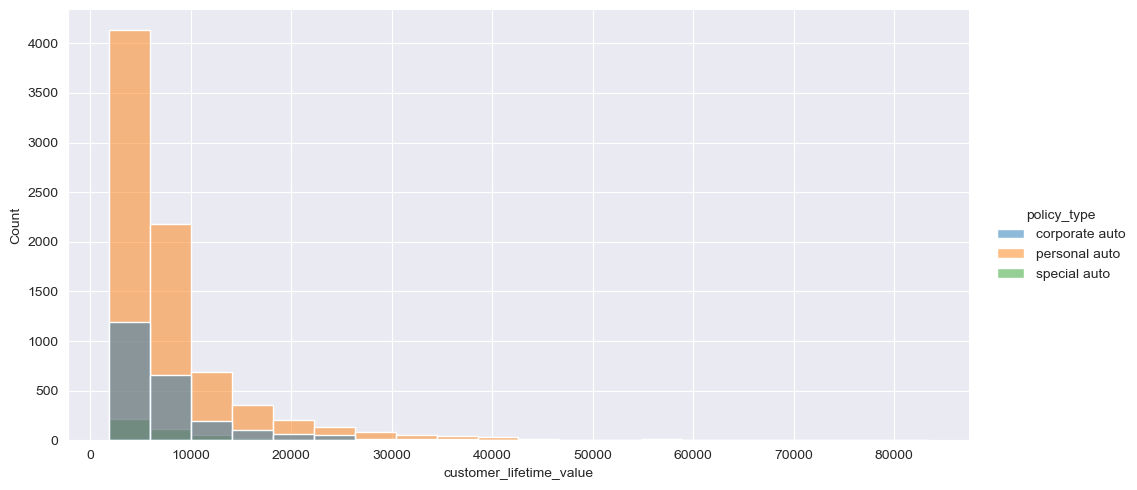

In [37]:
sns.displot(c_df, x="customer_lifetime_value", bins=20,aspect=2, hue='policy_type')

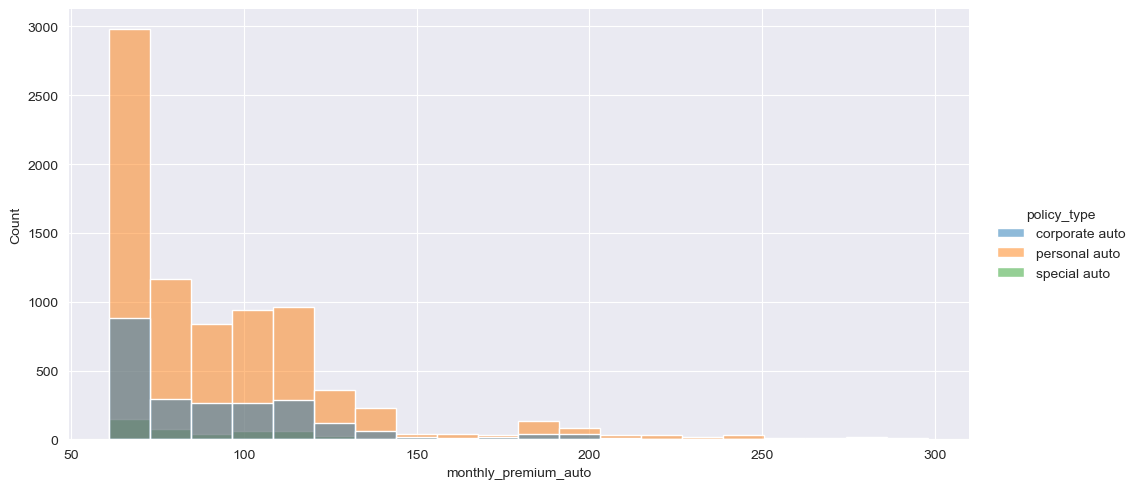

In [38]:
sns.displot(c_df, x="monthly_premium_auto", bins=20,aspect=2, hue='policy_type')

<i> the number_of_open_complaints and number_of_policies fields are discrete so we remove them below

In [39]:
n_data = [x for x in numericals_df.columns] # list of columns
n_data

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

In [40]:
# remove the discrete fields
n_data.remove('number_of_open_complaints')
n_data.remove('number_of_policies')

#### Distributions

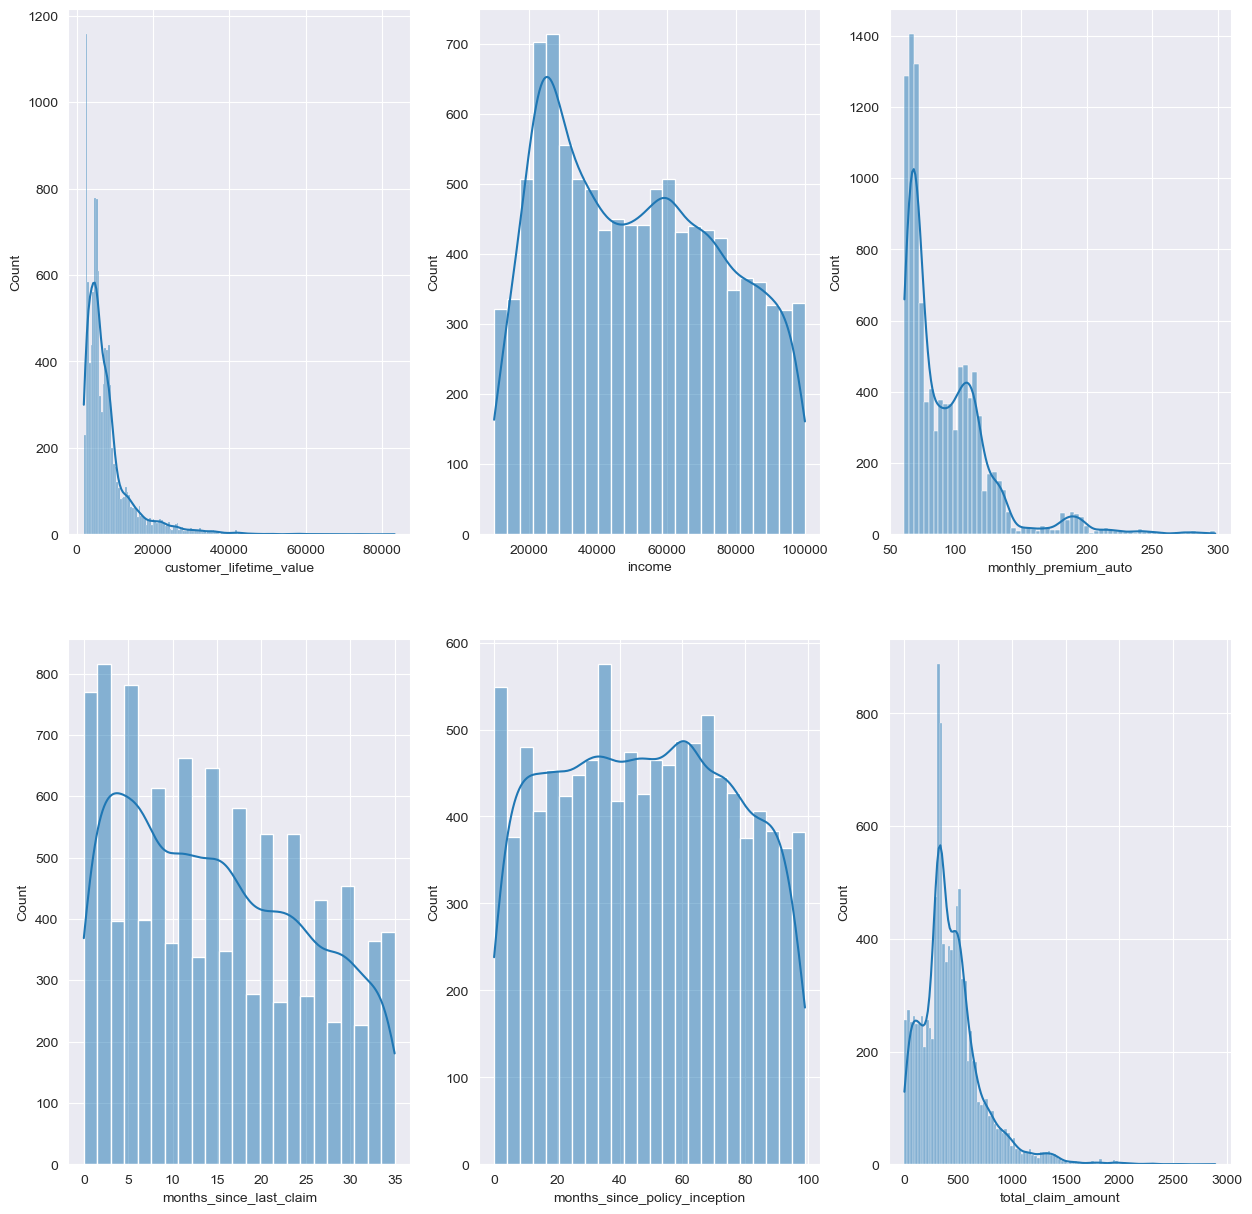

In [41]:
fig, axes = plt.subplots(ncols=3, nrows=2,figsize=(15,15))
# generate canvas of plots
for i, ax in zip(range(6), axes.flat):
    _=sns.histplot(c_df[n_data[i]], ax=ax,kde=True)
plt.show()

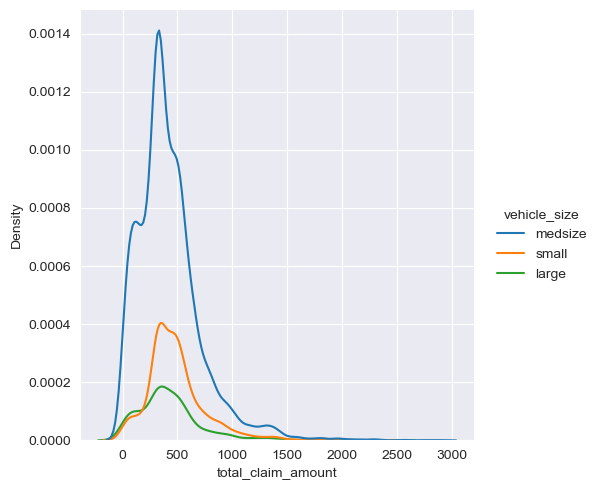

In [42]:
sns.displot(c_df, x="total_claim_amount", kind="kde",  hue="vehicle_size")

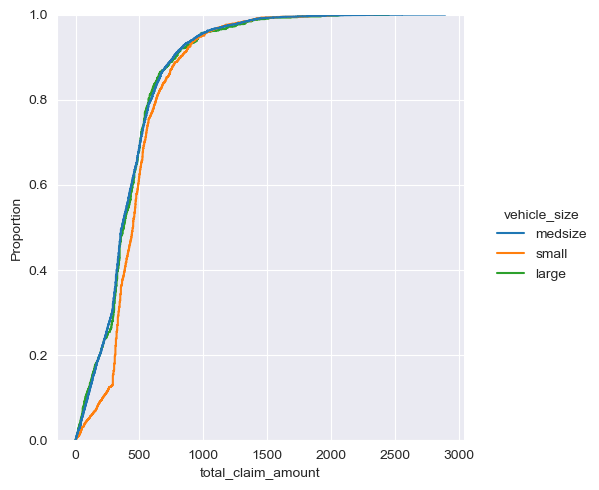

In [43]:
sns.displot(c_df, x="total_claim_amount", kind="ecdf", hue="vehicle_size") # cumulative distributions

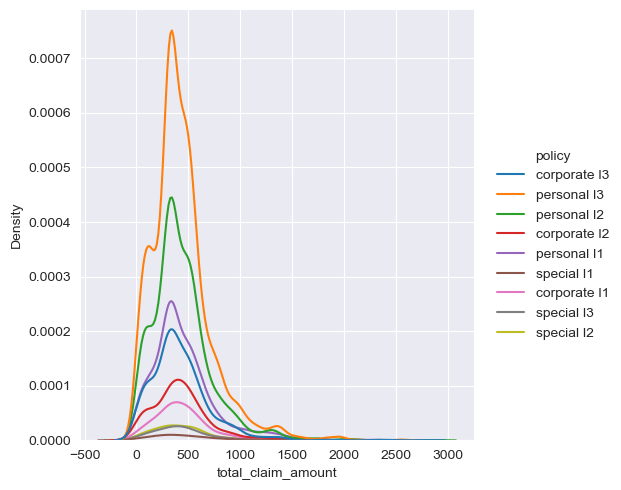

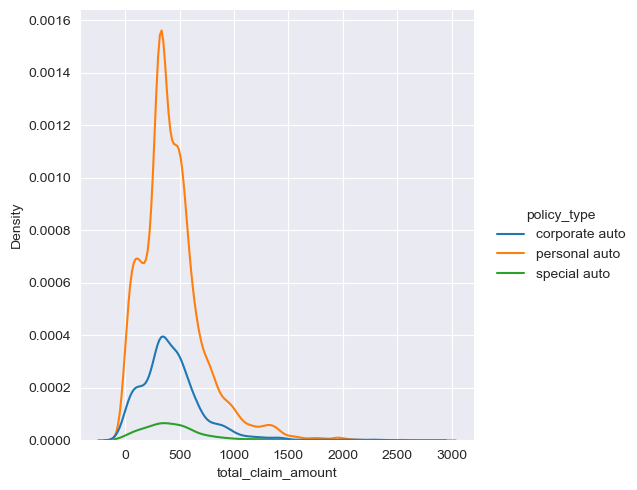

In [44]:
_=sns.displot(c_df, x="total_claim_amount", kind="kde", hue="policy")  # cumulative distributions
_=sns.displot(c_df, x="total_claim_amount", kind="kde", hue="policy_type")  # cumulative distributions

##### Fitting

C:\Users\Phylanx\AppData\Local\Temp\ipykernel_13420\1814176438.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(numericals_df['customer_lifetime_value'], hist = False, kde = True,
C:\Users\Phylanx\AppData\Local\Temp\ipykernel_13420\1814176438.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637275

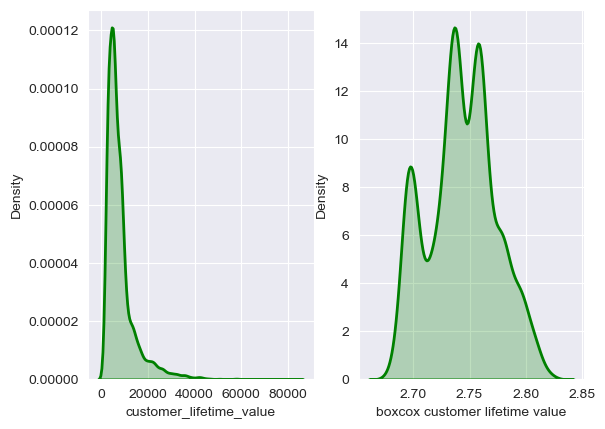

In [45]:
# transform training data & save lambda value
bc_customer_lifetime_value, _ = boxcox(numericals_df['customer_lifetime_value'])

# creating axes to draw plots
fig, ax = plt.subplots(1, 2)

# plotting the original data(non-normal) and
# fitted data (normal)
_ = sns.distplot(numericals_df['customer_lifetime_value'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])

_= sns.distplot(bc_customer_lifetime_value, hist = False, kde = True, axlabel='boxcox customer lifetime value',
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])

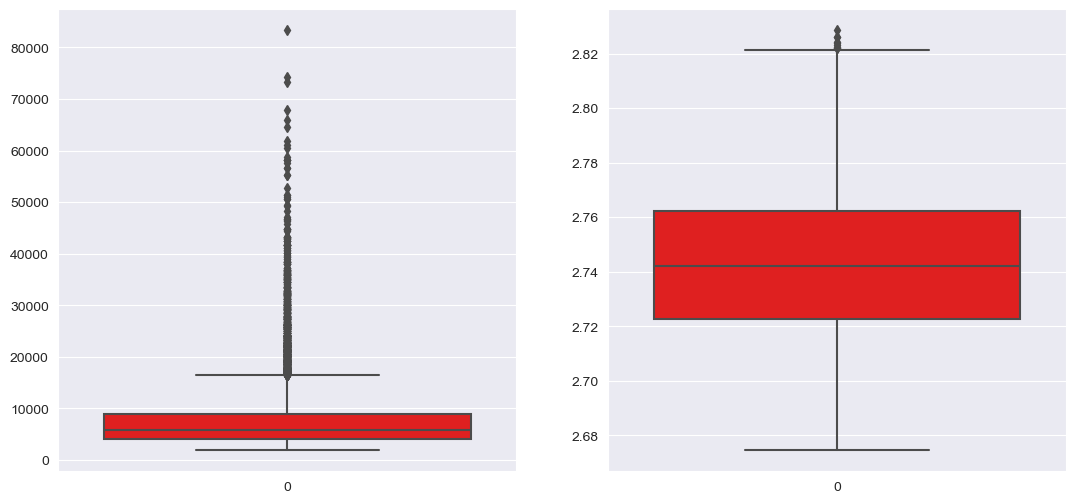

In [46]:
# creating axes to draw plots
fig, ax = plt.subplots(1, 2, figsize=(13,6))
_=sns.boxplot(numericals_df['customer_lifetime_value'], ax=ax[0], color='red')
_=sns.boxplot(bc_customer_lifetime_value, ax = ax[1], color='red')

In [47]:
corr_mat = numericals_df.corr()
corr_mat

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.003732,0.404235,0.011912,0.017055,-0.032371,0.016789,0.232849
income,0.003732,1.000000,-0.002431,-0.026564,0.003846,0.018903,-0.004461,-0.111221
monthly_premium_auto,0.404235,-0.002431,1.000000,0.010036,0.019696,-0.008811,-0.018805,0.630149
months_since_last_claim,0.011912,-0.026564,0.010036,1.000000,-0.034086,0.001204,0.000814,0.013874
months_since_policy_inception,0.017055,0.003846,0.019696,-0.034086,1.000000,0.002554,-0.009719,0.004186
number_of_open_complaints,-0.032371,0.018903,-0.008811,0.001204,0.002554,1.000000,-0.000303,-0.010668
number_of_policies,0.016789,-0.004461,-0.018805,0.000814,-0.009719,-0.000303,1.000000,-0.008019
total_claim_amount,0.232849,-0.111221,0.630149,0.013874,0.004186,-0.010668,-0.008019,1.000000


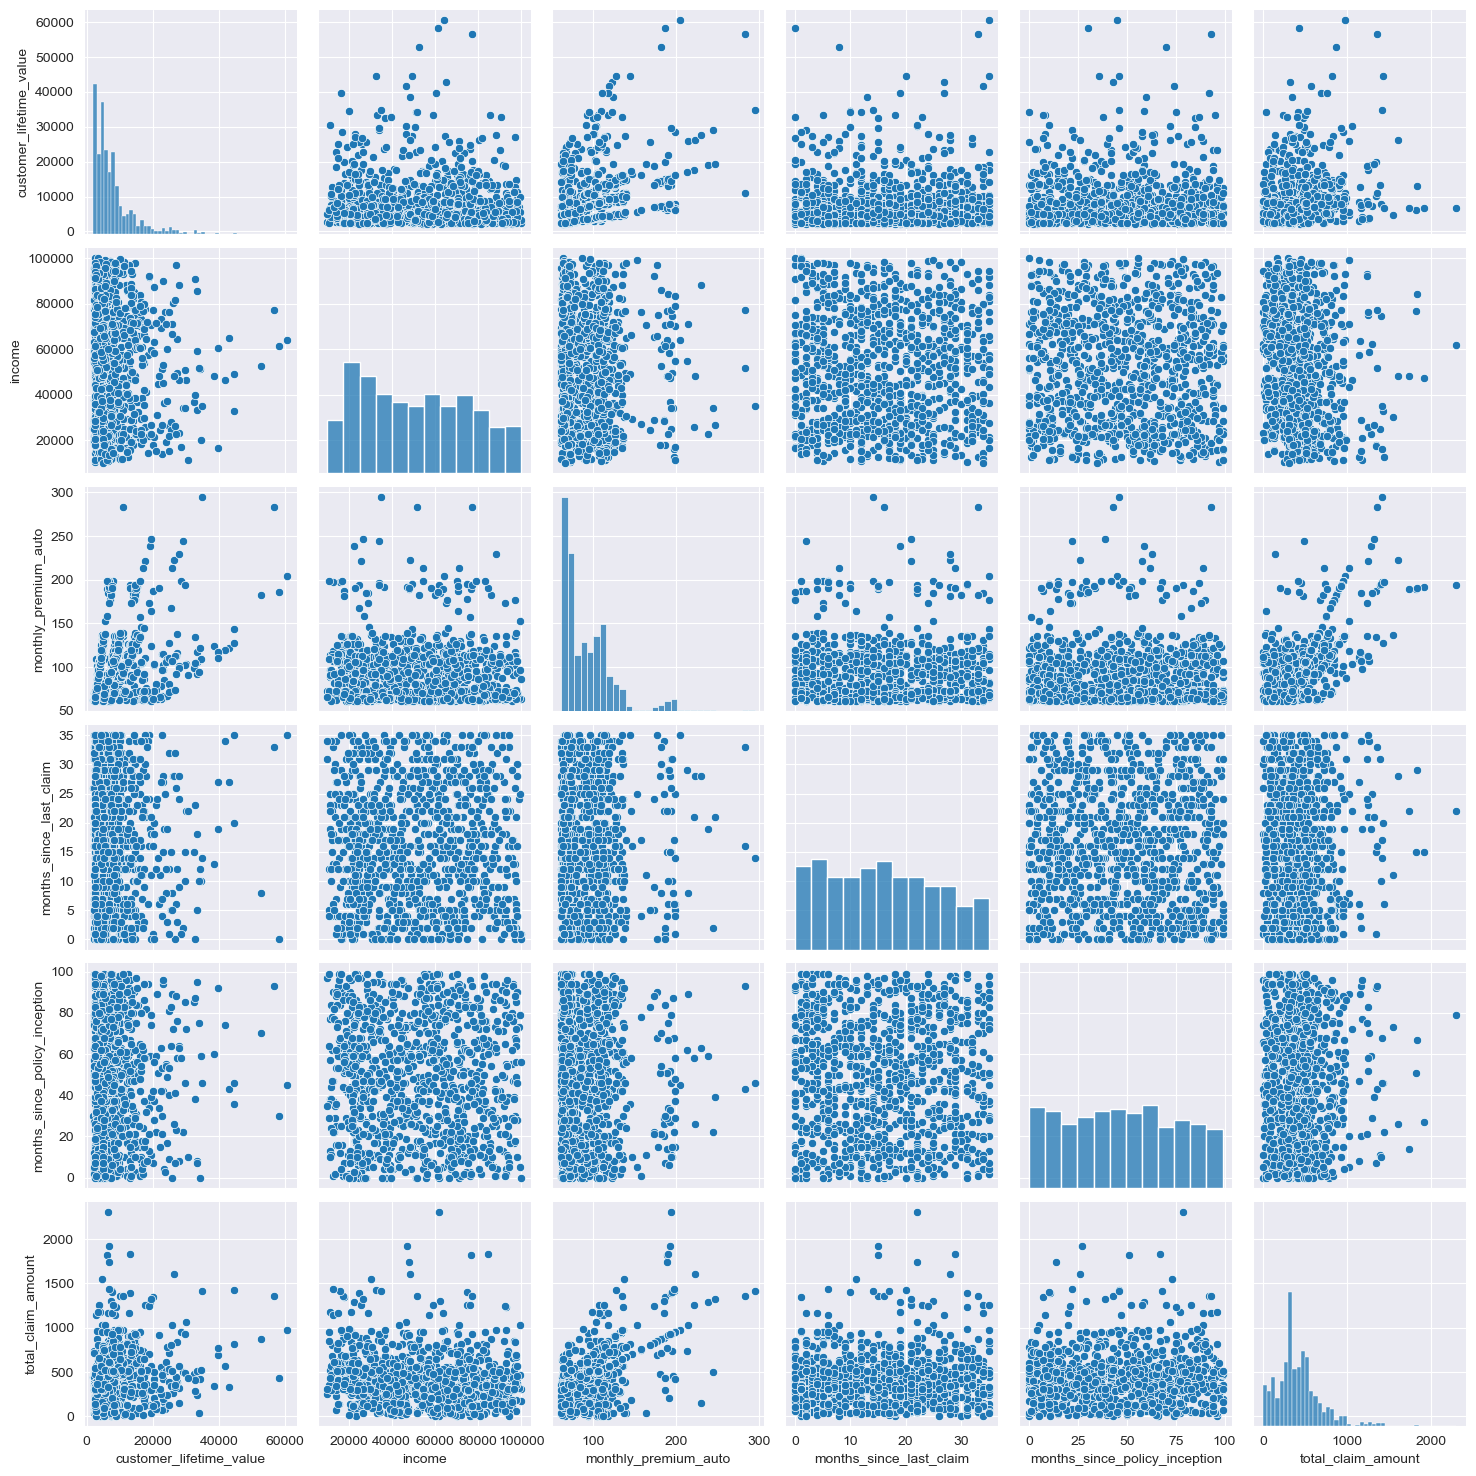

In [48]:
_=sns.pairplot(numericals_df.drop(columns=['number_of_open_complaints','number_of_policies']).sample(frac=.1))

w##### HEATMAP

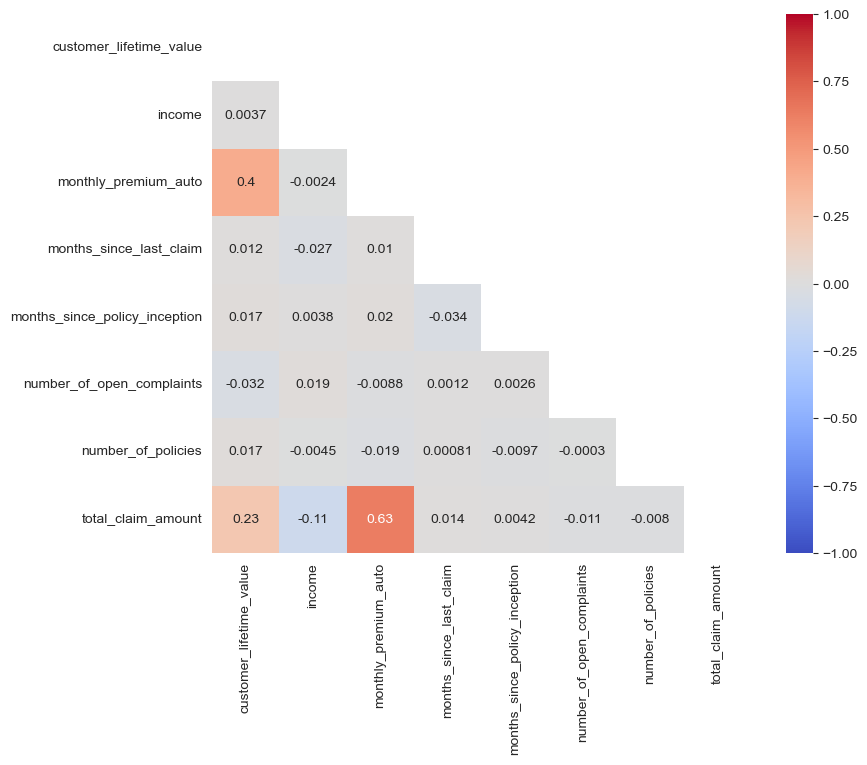

In [49]:
n_corr = numericals_df.corr()
corr_mask = np.zeros_like(n_corr)
corr_mask[np.triu_indices_from(corr_mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(n_corr, mask=corr_mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [50]:
n_corr.to_csv('correlation_mat.csv',index_label=False)

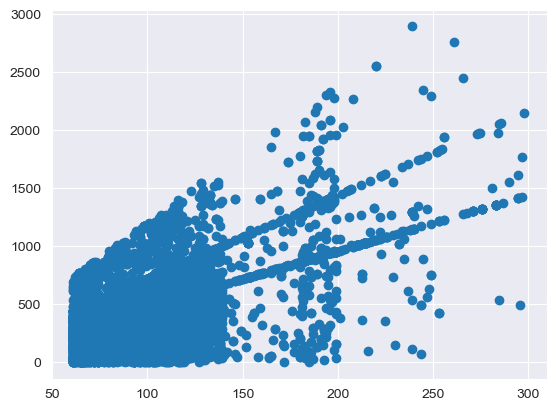

In [51]:
plt.scatter(x=numericals_df['monthly_premium_auto'], y=numericals_df['total_claim_amount'])
plt.show()

In [52]:
numericals_df['monthly_premium_auto']

0         61
1         64
2        100
3         97
4        117
        ... 
10684    253
10685     65
10686    201
10687    158
10688    101
Name: monthly_premium_auto, Length: 10689, dtype: int64

#### Observations
- Negligible multicolinearity in the data
- Modest correlation (r=approx .6) between total_claim_amount and monthly_premium_auto. Customer_lifetime_value is moderatedly correlated (r=.4) with monthly_premium_auto and total_claim_amount (r=.25) as well. The months_since_last_claim and monthly_premium_auto are expected to be anticorrelated, but this is not observed.


#### Highly Correlated Columns (absence of)

In [53]:
corr_thresh    =  0.9
corr_abs       = n_corr.abs()
upper_triangle = corr_abs.where(np.triu(np.ones(corr_abs.shape),k=1).astype(bool))
if len([column for column in upper_triangle.columns if any(upper_triangle[column] > corr_thresh)]) == 0:
    print("no correlated columns")

no correlated columns


### Categorical representations

<Figure size 2000x1500 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Coverage count by policy type')

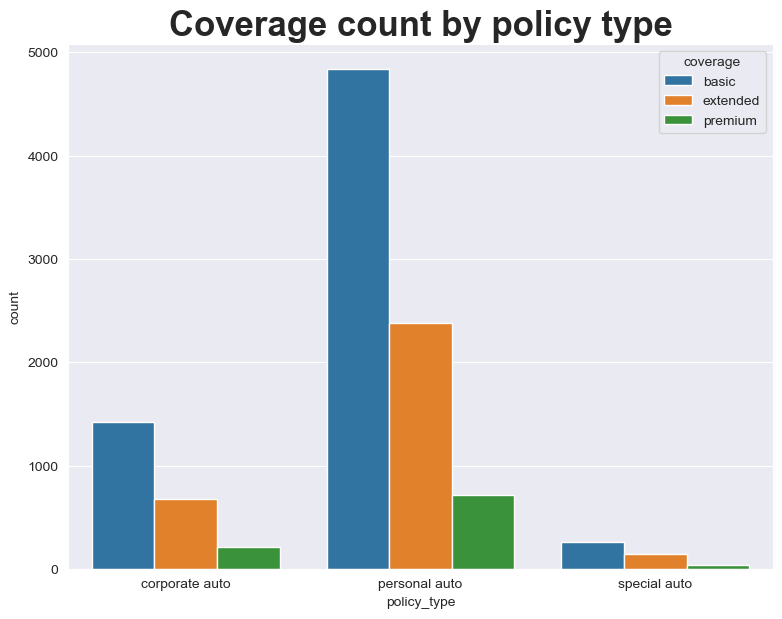

In [54]:
policy_cvg_counts_df = categoricals_df.groupby(['policy_type','coverage'])['policy'].count().rename('count').reset_index()
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Coverage count by policy type', size='25', fontweight='bold')
_=sns.barplot(x = policy_cvg_counts_df['policy_type'],y = policy_cvg_counts_df['count'], hue = policy_cvg_counts_df['coverage'])

<AxesSubplot:xlabel='income'>

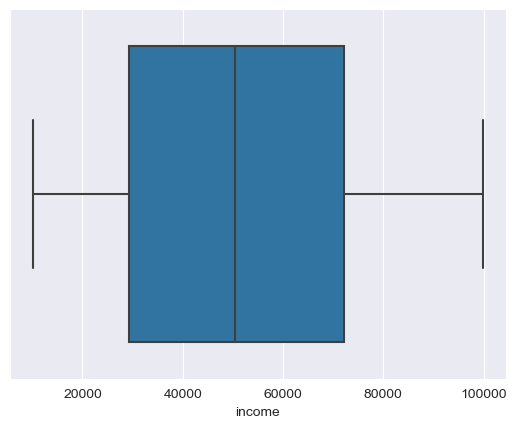

In [55]:
sns.boxplot(x="income",data=numericals_df)

### Customer responses
**SUMMARY**
-  total number of responses (most customers don't respond)
-  response by the sales channel (Agent sales have highes number of responses)
-  response by the total claim amount (low claim amounts dominate)
-  response by income (middle incomes)


### Read and clean

In [56]:
c2_df = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round2.csv')

In [57]:
c2_df.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [58]:
c2_df.drop(labels=['Unnamed: 0'],axis=1,inplace=True) # drop the unnamed field

In [59]:
def lower_case_column_names(df):
    ''' make columns lower case '''
    if isinstance(df,pd.core.frame.DataFrame):
        df.columns= [i.lower() for i in df.columns]
        df.columns = df.columns.str.replace(' ', '_')
    else:
        raise TypeError
    return df

In [60]:
lower_case_column_names(c2_df).head() # make headers uniformly lower case
c2_df.columns

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'vehicle_type'],
      dtype='object')

###  Overall responses

<Figure size 900x700 with 0 Axes>

Text(0.5, 1.0, 'Number of Responses')

([<matplotlib.axis.YTick at 0x2507e86ebe0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:title={'center':'Number of Responses'}, xlabel='response', ylabel='Count'>

Text(0.5, 0, 'response')

Text(0, 0.5, 'count')

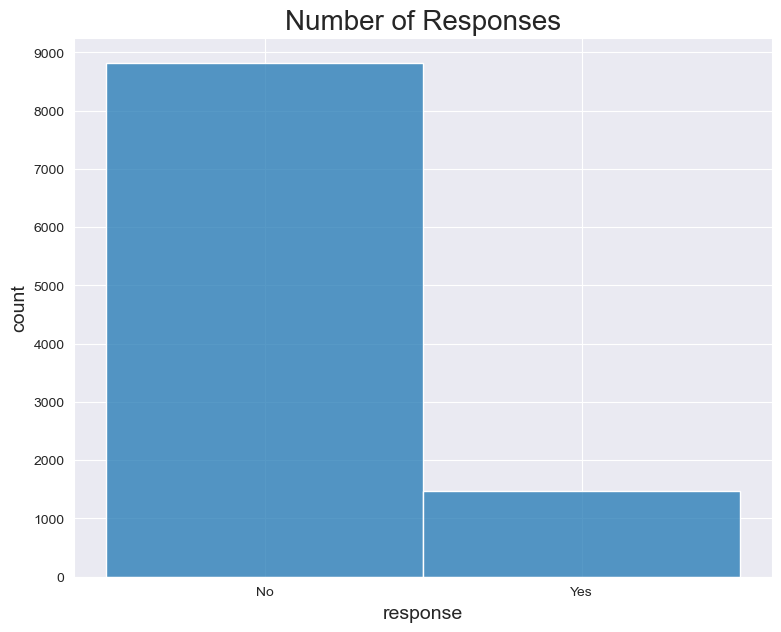

In [61]:
plt.figure(figsize=(9,7))
#plt.subplot(2,2,1)
plt.title('Number of Responses', size='20')
plt.yticks(np.arange(0,10000,1000))
sns.histplot(data=c2_df,x="response", stat="count")
plt.xlabel('response',size=14)
plt.ylabel('count',size=14)

### Responses for selected categories

#### Response by the sales channel

In [62]:
response_cnt = c2_df.groupby('sales_channel')['response'].value_counts()
type(response_cnt)

pandas.core.series.Series

In [63]:
response_cnt

sales_channel  response
Agent          No          3148
               Yes          742
Branch         No          2539
               Yes          326
Call Center    No          1792
               Yes          221
Web            No          1334
               Yes          177
Name: response, dtype: int64

<Figure size 900x700 with 0 Axes>

Text(0.5, 1.0, 'Response by Sales Channel')

<AxesSubplot:title={'center':'Response by Sales Channel'}, xlabel='sales_channel', ylabel='count'>

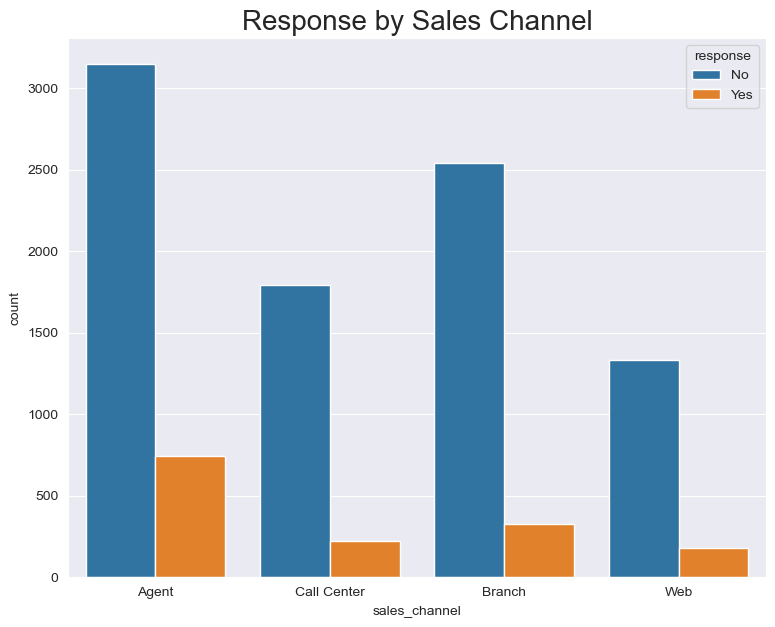

In [64]:
plt.figure(figsize=(9,7))
plt.title('Response by Sales Channel', size='20')

sns.countplot(x=c2_df['sales_channel'], hue=c2_df['response'])

#### Response by the total claim amount

##### calculations

In [65]:
chopped_claim_amounts = pd.cut(c2_df['total_claim_amount'],4,\
    labels=['c1:(0,723]','c2:(723,1447]','c3:(1447,2170])','c4:(2170,2893]'])

In [66]:
pd.cut(c2_df['total_claim_amount'],4) # split claims into 4 uniform bins

0          (-2.794, 723.384]
1        (723.384, 1446.669]
2          (-2.794, 723.384]
3          (-2.794, 723.384]
4          (-2.794, 723.384]
                ...         
10905    (723.384, 1446.669]
10906      (-2.794, 723.384]
10907      (-2.794, 723.384]
10908      (-2.794, 723.384]
10909    (723.384, 1446.669]
Name: total_claim_amount, Length: 10910, dtype: category
Categories (4, interval[float64, right]): [(-2.794, 723.384] < (723.384, 1446.669] < (1446.669, 2169.955] < (2169.955, 2893.24]]

##### results

<Figure size 1000x800 with 0 Axes>

Text(0.5, 1.0, 'Respone by Claim Amount')

Text(0.5, 0, 'claim bracket')

Text(0, 0.5, 'count')

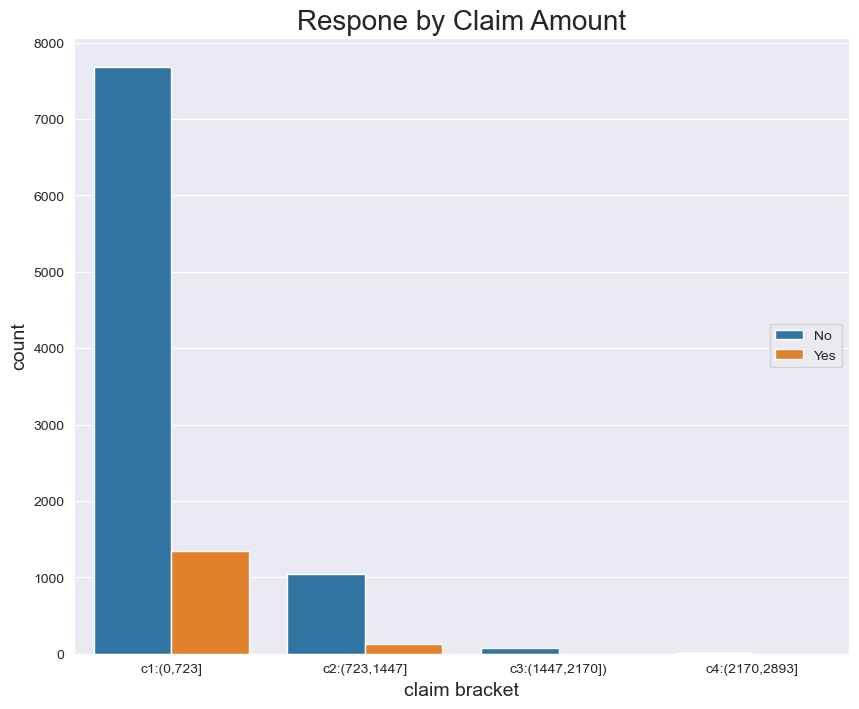

In [67]:
plt.figure(figsize=(10,8))
plt.title('Respone by Claim Amount', size='20')
#plt.xlabel('quartiles of total sales [2893]' )
ax = sns.countplot(x=chopped_claim_amounts, hue=c2_df['response'])
ax.set_xlabel('claim bracket', size=14)
plt.legend(loc='right')
plt.ylabel('count',size=14)

The claims tend to be in the lowest bracket

#### Response by income

##### calculations

In [68]:
c2_df['income'].max()

99981

In [69]:
income_bins = [int(99981*x+.001) for x in [0,.25,.5,.75,1]]
bins = [0,25000,50000,75000,100000]
bins

[0, 25000, 50000, 75000, 100000]

In [70]:
income_cut = pd.cut(c2_df['income'],bins, labels=['<25k','25k to 50k','50k to 75k','75k to 100k'],\
                    duplicates='drop')#,include_lowest=True)

#####  results

<Figure size 900x700 with 0 Axes>

Text(0.5, 1.0, 'Response by Income')

Text(0.5, 0, 'income bracket')

Text(0, 0.5, 'count')

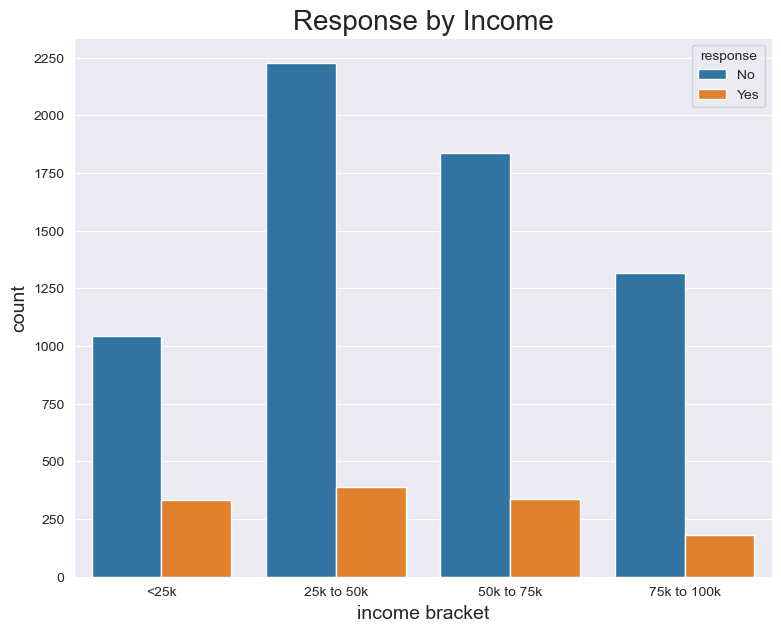

In [71]:
plt.figure(figsize=(9,7))
plt.title('Response by Income', size='20')
ax = sns.countplot(x=income_cut, hue=c2_df['response'])
ax.set_xlabel('income bracket',size=14)
ax.set_yticks(np.arange(0,2500,250))
plt.ylabel('count',size=14)